In [1]:
import random 
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP
from micrograd.graph_vis import draw_dot

In [2]:
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

b = Value(6.8813, label= 'b')

x1w1 = x1*w1; x1w1.label = "x1 * w1"
x2w2 = x2*w2; x2w2.label = "x2 * w2"

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2. label = "x1w1 + x2w2"

n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'
o.backward()

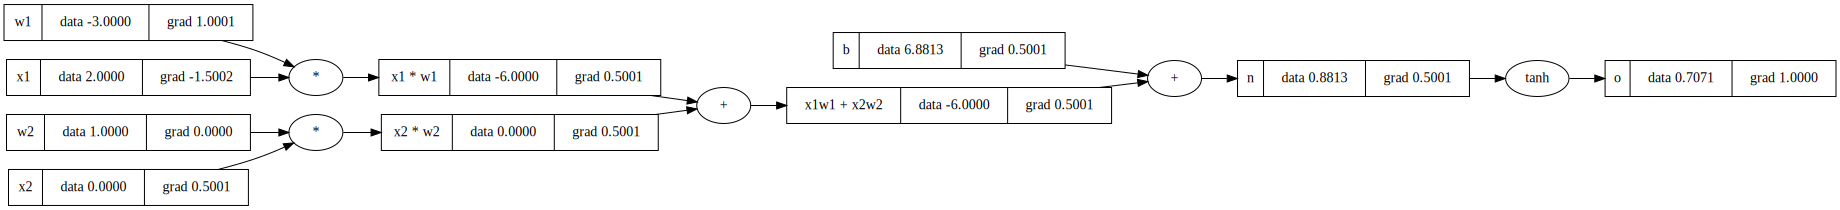

In [3]:
draw_dot(o)

In [4]:
# Simple Example

# define network:
# 3 inputs in each data point, 3 layers
n = MLP(3, [4, 4, 1])


# data points
xs = [
        [2.0, 3.0, -1.0], 
        [3.0, -1.0, 0.5], 
        [0.5, 1.0, 1.0], 
        [1.0, 1.0, -1.0]
    ]
# y values (real)
ys = [1.0, -1.0, -1.0, 1.0]

# run the network on all the examples, and get a prediction for each:
ypred = [n(x) for x in xs]

# calculate the loss over all examples.
# computing the loss from the predication, add it as the final node in the computational graph
loss = sum([(pred - y)**2 for y, pred in zip(ys, ypred)], Value(0))

In [5]:
# loss is the sum we calaculated for all the example, it's the final node in the graph.
# we can run 'backwards' on it, to calaculate the gradients
loss.backward()

In [7]:
# we can look at the values of data, and grad for each paramerter in the network for debugging
print(n.layers[0].neurons[0].w[0].data)
print(n.layers[0].neurons[0].w[0].grad)

# all network paramerters
print(len(n.parameters()))

-0.3948268743189389
-3.62936653204805
41


In [8]:
# manual gradient decent
lr = 0.01
for p in n.parameters():
    p.data += -lr * p.grad 

In [9]:
# Training loop
for k in range(10):
    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum([(pred - y)**2 for y, pred in zip(ys, ypred)], Value(0))

    # zero_grad
    for p in n.parameters():
        p.grad = 0

    # backward pass
    loss.backward()

    # update
    for p in n.parameters():
        p.data += -lr * p.grad
    
    print(k, loss.data)

0 1.7704853281628985
1 1.1387055699145237
2 0.7683446800874392
3 0.5489838198784126
4 0.4285915139640498
5 0.34913105629996927
6 0.2867796793618847
7 0.23137206698520574
8 0.19909212469847143
9 0.17797216980437564
